# House Price Correlation Study

## Objectives

* Answer business requirement 1:
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* `outputs/datasets/cleaned/CompleteSetCleaned.csv`

## Outputs

* `outputs/datasets/cleaned/CompleteStudyData.csv`
* Generate initial information that answers business requirement 1 that can be used to build the Streamlit Application. 

---

# Import all modules required in the workbook

In [1]:
import os
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Change working directory

The notebooks for this project are stored in a subfolder called `jupyter_notebooks`, therefore when running the notebook, the working directory needs to be changed to the parent folder. 
* We access the current directory with `os.getcwd()`

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/pp5-house-price-predictor/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory of: ", os.getcwd())

You set a new current directory of:  /workspace/pp5-house-price-predictor


---

# Load Collected Data

In [4]:
df_raw_path = "outputs/datasets/cleaned/CompleteSetCleaned.csv"
df = pd.read_csv(df_raw_path)
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.000000,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.000000,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.000000,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,2.869214,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.000000,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


# Data Exploration

We are interested in getting more familiar with the dataset, by checking variable type and distribution, missing levels and what these variables mean in a business context.

Note that we are using the fully cleaned dataset, which has had its missing values already imputed. The decision to do this prior to the study, was to ensure that relevant features will be highlighted. Therefore there is no requirement to assess the missing levels as this has occured in the data cleaning notebook, `2_Data_Cleaning.ipynb`.

In [5]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Encoding

Feature Engine has different options for encoding categorical variables. One Hot Encoding and Ordinal Encoder. However, I have decided to map the categorical features by hand as they do show inherent order.

In [6]:
unique_values_dict = {}

list_of_ordinal_features = df.select_dtypes(include=['object']).columns.tolist()

for item in list_of_ordinal_features:
    unique_values_dict[item] = df[item].unique().tolist()
    print(f"Feature: {item} - {unique_values_dict[item]}")

Feature: BsmtExposure - ['No', 'Gd', 'Mn', 'Av', 'None']
Feature: BsmtFinType1 - ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ']
Feature: GarageFinish - ['RFn', 'Unf', 'Fin', 'None']
Feature: KitchenQual - ['Gd', 'TA', 'Ex', 'Fa']


As you can see below for the 4 categorical variables, they define increasing levels of quality, finish or exposure.

|Variable|Meaning|Units|
|:----|:----|:----|
|BsmtExposure|Refers to walkout or garden level walls|Gd: Good Exposure; Av: Average Exposure; Mn: Minimum Exposure; No: No Exposure; None: No Basement|
|BsmtFinType1|Rating of basement finished area|GLQ: Good Living Quarters; ALQ: Average Living Quarters; BLQ: Below Average Living Quarters; Rec: Average Rec Room; LwQ: Low Quality; Unf: Unfinshed; None: No Basement|
|GarageFinish|Interior finish of the garage|Fin: Finished; RFn: Rough Finished; Unf: Unfinished; None: No Garage|
|KitchenQual|Kitchen quality|Ex: Excellent; Gd: Good; TA: Typical/Average; Fa: Fair; Po: Poor|

The below maps the ordinal categories to numeric values

In [7]:
BsmtExposure_mapping = {
    'None': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}

BsmtFinType1_mapping = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6,
}

GarageFinish_mapping = {
    'None': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3,
}

KitchenQual_mapping = {
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4,
}

# Apply the mapping to the column
df['BsmtExposure'] = df['BsmtExposure'].map(BsmtExposure_mapping)
df['BsmtFinType1'] = df['BsmtFinType1'].map(BsmtFinType1_mapping)
df['GarageFinish'] = df['GarageFinish'].map(GarageFinish_mapping)
df['KitchenQual'] = df['KitchenQual'].map(KitchenQual_mapping)
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.000000,1,706,6,150,548,2,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.000000,4,978,5,284,460,2,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.000000,2,486,6,434,608,2,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,2.869214,1,216,5,540,642,1,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.000000,3,655,6,490,836,2,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.000000,1,0,1,953,460,2,1999.0,...,7917,62.0,0.0,40,5,6,953,1999,2000,175000
1456,2073,0.0,2.869214,1,790,5,589,500,1,1978.0,...,13175,85.0,119.0,0,6,6,1542,1978,1988,210000
1457,1188,1152.0,4.000000,1,275,6,877,252,2,1941.0,...,9042,66.0,0.0,60,9,7,1152,1941,2006,266500
1458,1078,0.0,2.000000,2,49,1,0,240,1,1950.0,...,9717,68.0,0.0,0,6,5,1078,1950,1996,142125


## Correlation Study

### Spearman Correlation

In [8]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageYrBlt     0.563256
GarageFinish    0.557801
Name: SalePrice, dtype: float64

### Pearson Correlation

In [9]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageFinish    0.483334
MasVnrArea      0.472614
Name: SalePrice, dtype: float64

In [10]:
top_n = 5
top_vars = set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

In [11]:
vars_to_study = list(set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()))
vars_to_study

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'YearBuilt',
 'OverallQual',
 'KitchenQual']

We will study the following variables and their impact on the SalePrice:

* OverallQual shows similar levels of strong positive correlation for both Spearman (0.809829) and Pearson (0.790982). We will investigate if a higher quality finish to a house positively increases the SalePrice
* GrLivArea shows similar levels of strong positive correlation for both Spearman (0.731310) and Pearson (0.708624). We will investigate if a larger square feet of ground floor living space positively increases the SalePrice
* KitchenQual shows similar levels of moderate positive correlation for both Spearman (0.672849) and Pearson (0.659600). We will investigate if a higher quality kitchen positively increases the SalePrice
* YearBuilt shows a moderate positive correlation for both Spearman (0.652682) and Pearson (0.522897). We will investigate if a more recently built homes positively increases the SalePrice
* TotalBsmtSF shows similar levels of moderate positive correlation for both Spearman (0.602725) and Pearson (0.613581). We will investigate if a larger square feet of basement space positively increases the SalePrice
* GarageArea shows similar levels of moderate positive correlation for both Spearman (0.649379) and Pearson (0.623431). We will investigate if a larger square feet of garage space positively increases the SalePrice

## Exploratory Data Analysis (EDA) on selected variables

In [12]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,OverallQual,KitchenQual,SalePrice
0,1710,548,856,2003,7,3,208500
1,1262,460,1262,1976,6,2,181500
2,1786,608,920,2001,7,3,223500


### Variable Distribution by SalePrice

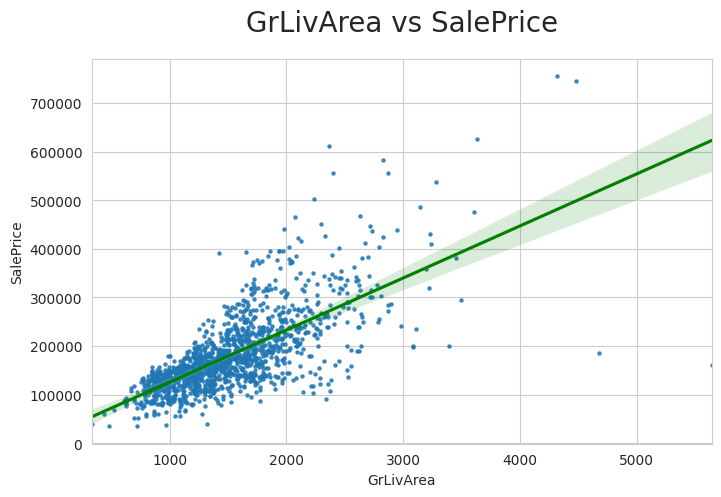

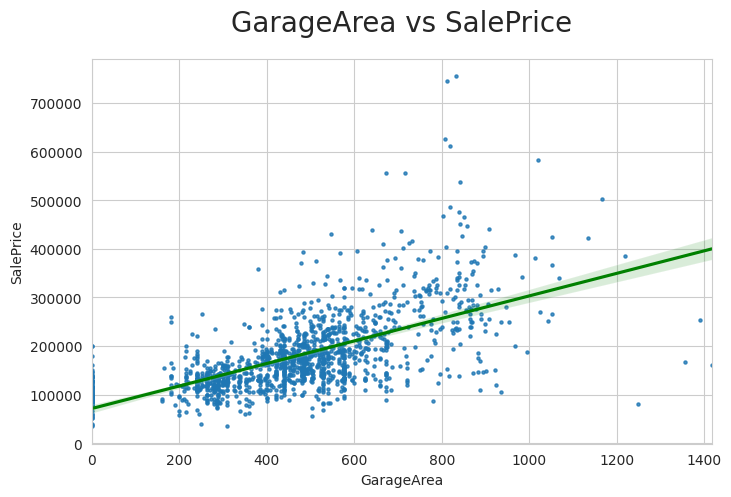

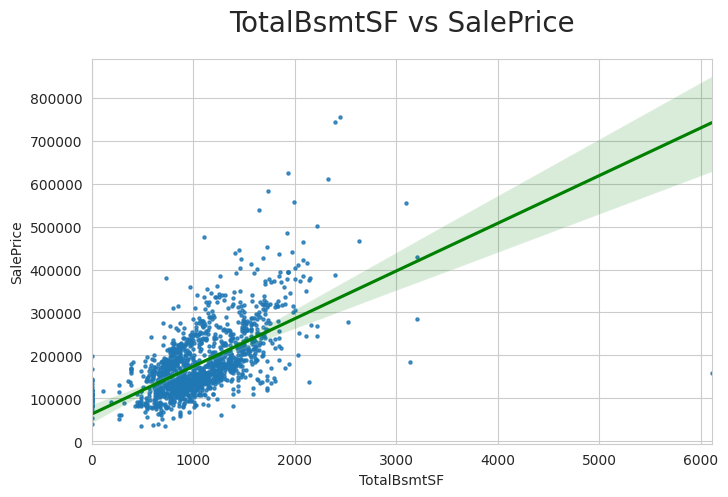

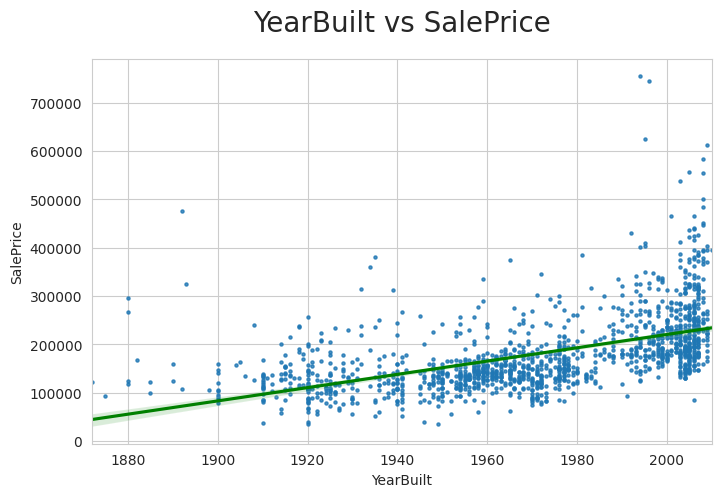

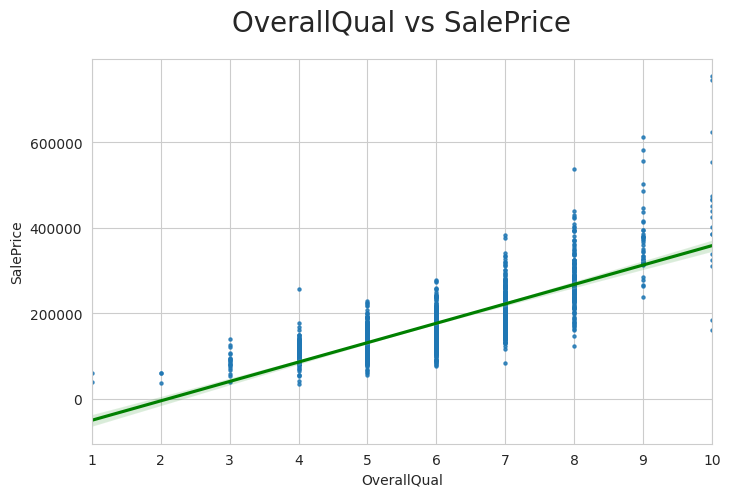

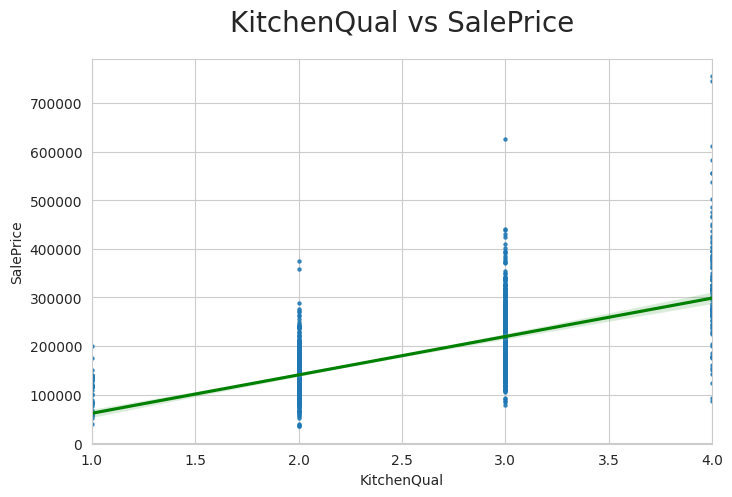

In [13]:
def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=col, y=target_var, scatter_kws={'s': 5}, line_kws={"color": "green"})
    plt.title(f"{col} vs {target_var}", fontsize=20, y=1.05)
    plt.show()

target_var = 'SalePrice'
for col in vars_to_study:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")

In [14]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df,
                    annot=True,
                    xticklabels=True,
                    yticklabels=True,
                    mask=mask,
                    cmap='viridis',
                    annot_kws={"size": font_annot},
                    ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df,
                         annot=True,
                         xticklabels=True,
                         yticklabels=True,
                         mask=mask,
                         cmap='rocket_r',
                         annot_kws={"size": font_annot},
                         linewidth=0.05,
                         linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print("PPS detects linear or non-linear relationships between two columns.\n"
          "The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [15]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.049  0.097  0.0  0.0  0.0  0.049  0.625




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



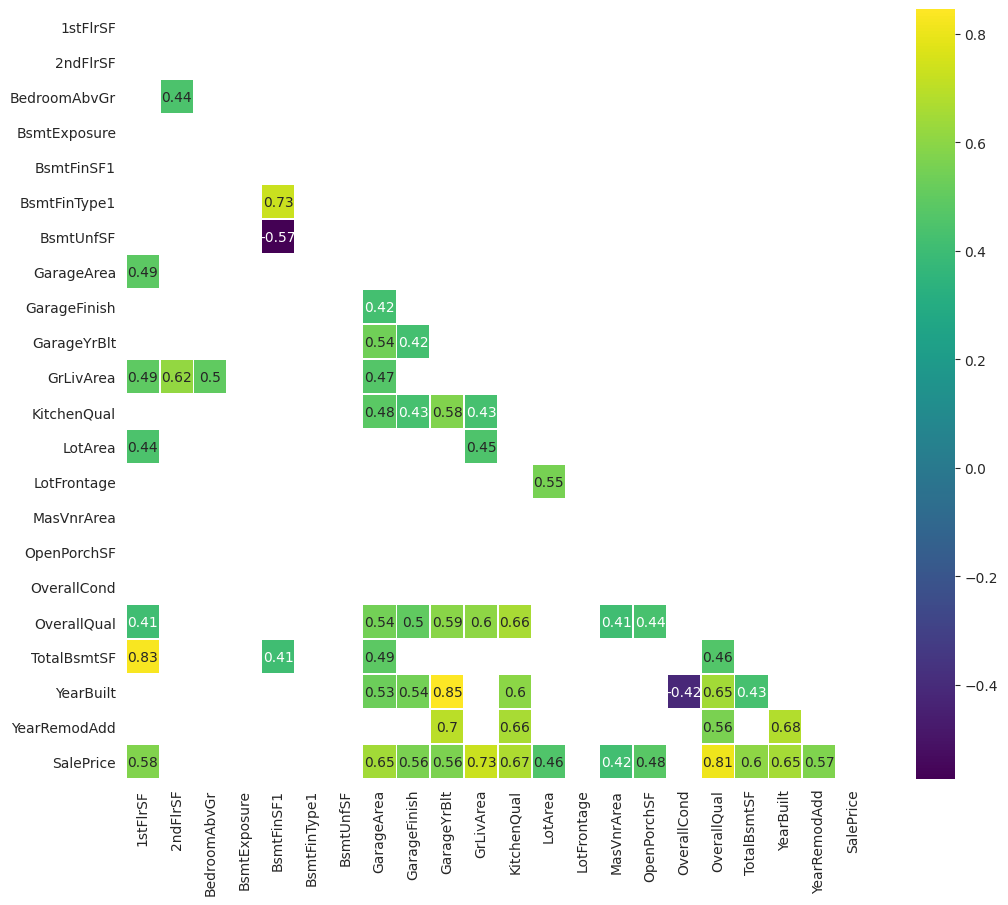



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



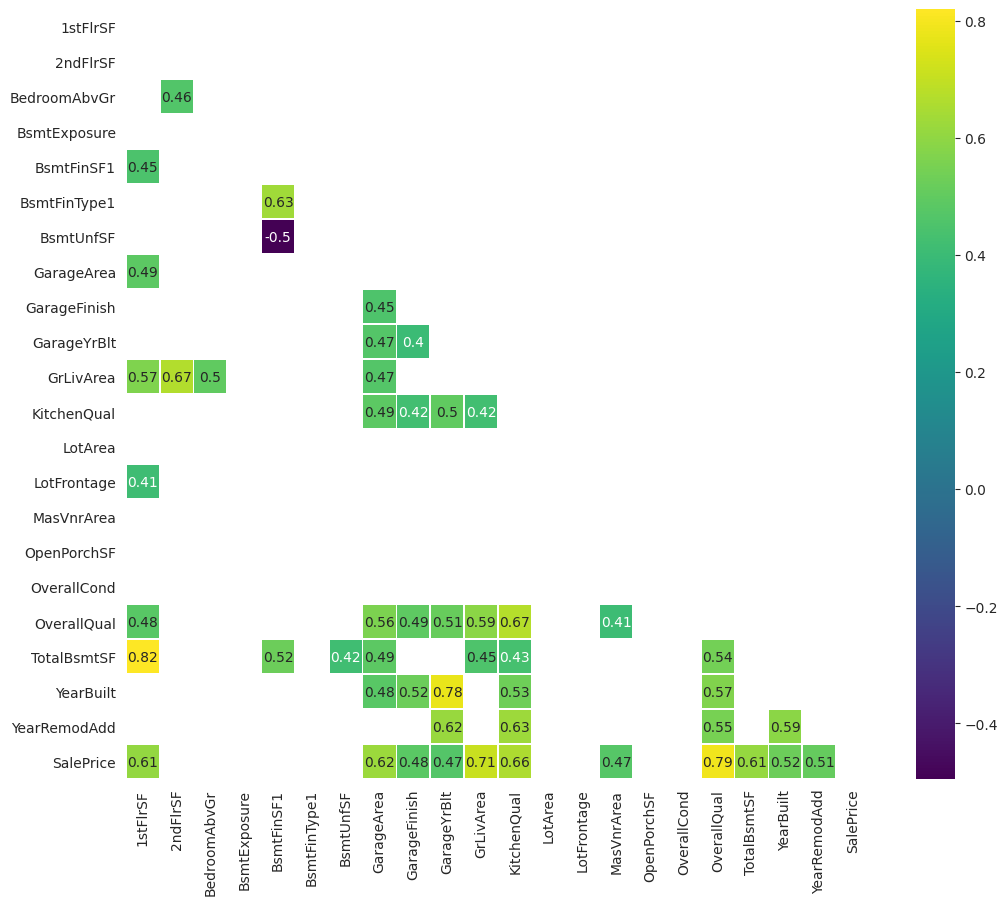



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



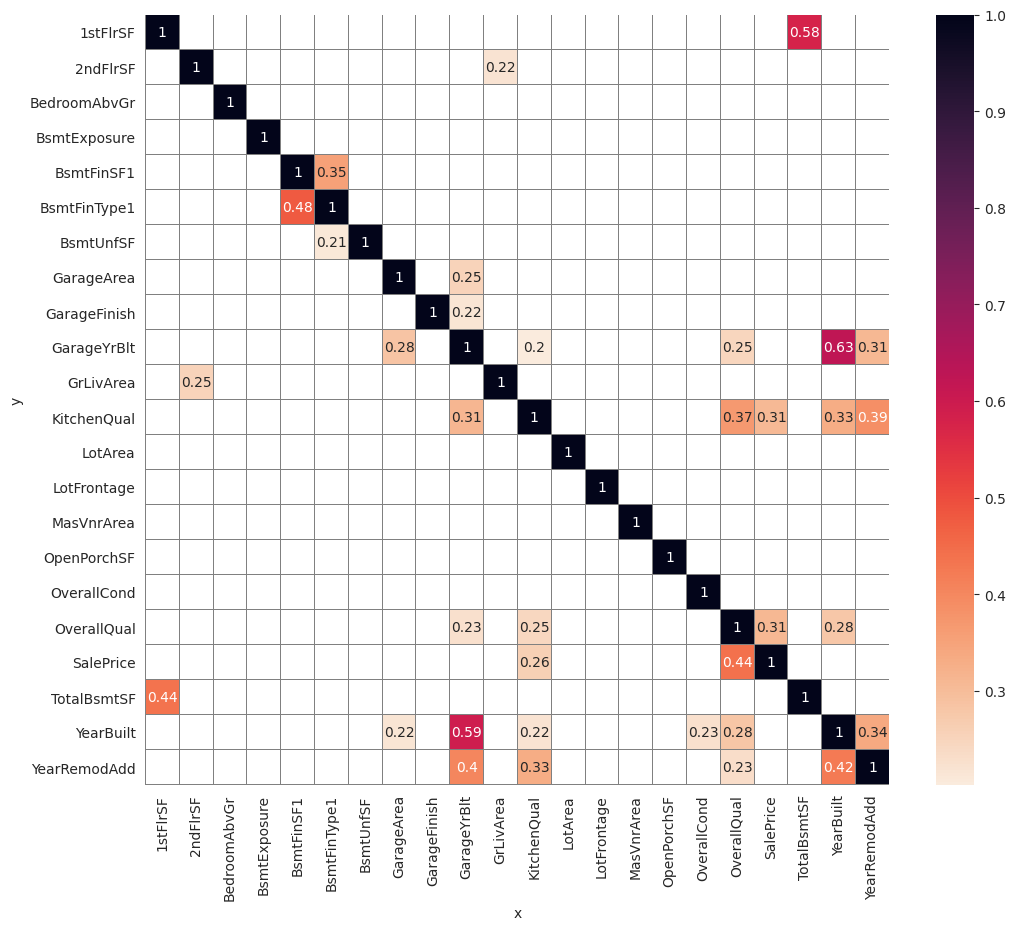

In [16]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman,
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.4,
                  PPS_Threshold=0.2,
                  figsize=(12, 10),
                  font_annot=10
                  )

**Correlation Findings**

* Spearman correlation:
  * Very Strong Correlation (0.7 - 1.0)
    * Features vs SalePrice
      * highlights that there is very strong correlation between `OverallQual` and `GrLivArea` vs `SalePrice`
    * Multi-colinearity
      * highlights that there is very strong multi-colinearity between `YearBuilt` and `GarageYrBlt`
  * highlights that there is very strong multi-colinearity between `TotalBsmtSF` and `1stFlrSF`
  * Strong Correlation (0.5 - 0.7) - *summarised for anything > 0.6
    * Features vs SalePrice
      * highlights that there is strong correlation between `1stFlrSF`, `GarageArea`, `GarageYrBlt`, `TotalBsmtSF`, `YearBuilt` and `YearRemodAdd`
    * Multi-colinearity
      * highlights that there is strong multi-colinearity between `GrLivArea` and `2ndFlrSF`
      * highlights that there is strong multi-colinearity between `OverallQual` and `GarageYrBlt`
      * highlights that there is strong multi-colinearity between `OverallQual` and `GrLivArea`
      * highlights that there is strong multi-colinearity between `OverallQual` and `YearBuilt`
      * highlights that there is strong multi-colinearity between `YearBuilt` and `YearRemodAdd`
* Pearson correlation:
  * Very Strong Correlation (0.7 - 1.0)
    * Features vs SalePrice
      * highlights that there is very strong correlation between `OverallQual` and `GrLivArea` vs `SalePrice`
    * Multi-colinearity
      * highlights that there is very strong multi-colinearity between `YearBuilt` and `GarageYrBlt`
      * highlights that there is very strong multi-colinearity between `TotalBsmtSF` and `1stFlrSF`
  * Strong Correlation (0.5 - 0.7) - *summarised for anything > 0.6
    * Features vs SalePrice
      * highlights that there is strong correlation between `1stFlrSF`, `GarageArea`, `GarageYrBlt`, `TotalBsmtSF`, `YearBuilt` and `YearRemodAdd`
    * Multi-colinearity
      * highlights that there is strong multi-colinearity between `GrLivArea` and `2ndFlrSF`
* Power Predictive Score
  * `GarageYrBlt` indicates it is a strong predictor of `YearBuilt` with a PPS of 0.70
  * `YearBuilt` indicates it is a moderate predictor of `GarageYrBlt` with with a PPS of 0.63
  * `OverallQual` indicates it is a moderate predictor of `KitchenQual` of with a PPS of 0.53

# Conclusions and Next Steps

The correlations and the charts both show that:

* A higher quality finish to a house positively increases the SalePrice
* A larger square feet of ground floor living space positively increases the SalePrice
* A higher quality kitchen positively increases the SalePrice
* A more recently built homes positively increases the SalePrice
* A larger square feet of basement space positively increases the SalePrice
* A larger square feet of garage space positively increases the SalePrice

Each of these are backed up with strong or moderate positive correlation levels and high or fairly high confidence levels on the regression plots

## Push files to repo

In [17]:
try:
    os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
    print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


Study data including the ordinal category changes, which will be used for the front end streamlit app study page

In [18]:
df.to_csv("outputs/datasets/cleaned/CompleteStudyData.csv", index=False)